# The .save is due to problems faced during git push - instructor named it this way to help solve issues

## The Authorea paper for this assignment has been published
## Every member of the team have been made co-authors for the paper
### The paper can be found in any of the team members' Authorea page 

#### Second half of the code created by Aaron D'Souza with the group for the group project !!
#### Group:
    - Anastasia Shegay
    - Priyanshi Singh
    - Akshay Penmatcha
    - Aaron D'Souza
    - Vishwajeet Shelar
    - Achilles Saxby

# IDEA

### The average trip duration of the customer is more than that of the subscriber which indicates that a single time user tries to make the best use of his investment.

# Null Hypothesis ($H_0$)

### The mean trip duration of single time user (customer) over a week is less than or equal to the mean trip duration of the subscribers over a week.

### $H_0$ : T(customer) <= T(subscriber)

# Alternate Hypothesis ($H_a$)

### The mean trip duration of single time user (customer) over a week in more than the mean trip duration of the subscribers over a week

### $H_a$: T(customer) > T(subscriber)

### We have used a significance level (α) = 0.05/5%

In [2]:
import datetime 
import calendar

my_date = datetime.datetime(2016, 9 , 26)
calendar.day_name[my_date.weekday()]

'Monday'

#### Using the Instructors Code to start the assignment

In [26]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

Populating the interactive namespace from numpy and matplotlib


#### Using Federica Bianco (Instructor's Code) to get and download the file to my homedir - aes807

In [4]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
            os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
datestring = '201606'
getCitiBikeCSV(datestring)

file in place, you can continue


In [6]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [7]:
df['date'] = pd.to_datetime(df['starttime'])

In [8]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [9]:
df.drop(['starttime','stoptime','start station id',
       'start station name','start station latitude',
       'start station longitude','end station id','end station name',
       'end station latitude','end station longitude','bikeid',
       'birth year','gender'], axis = 1, inplace = True)

In [10]:
df.head()

,tripduration,usertype,date
0,1470,Subscriber,2016-06-01 00:00:18
1,229,Subscriber,2016-06-01 00:00:20
2,344,Subscriber,2016-06-01 00:00:21
3,1120,Subscriber,2016-06-01 00:00:28
4,229,Subscriber,2016-06-01 00:00:53


In [11]:
df.describe()

,tripduration
count,1.460318e+06
mean,9.897580e+02
std,7.589179e+03
min,6.100000e+01
25%,4.050000e+02
50%,6.760000e+02
75%,1.143000e+03
max,3.129291e+06


#### A bird's eye view on how the two usertype's are related in the bigger scope of things

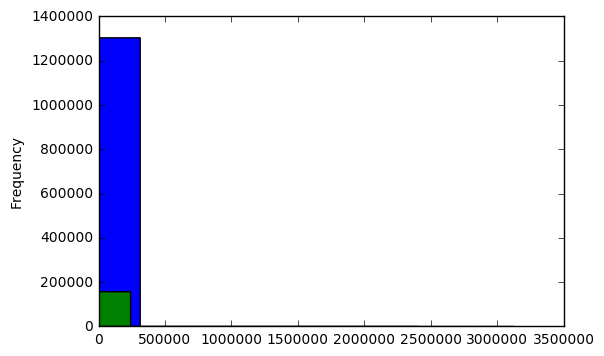

In [12]:
s = 60

subs = (df["tripduration"][df["usertype"] == "Subscriber"])  # blue
cust = (df["tripduration"][df["usertype"] == "Customer"])    # green

subs.plot(kind = 'hist')
cust.plot(kind = 'hist')

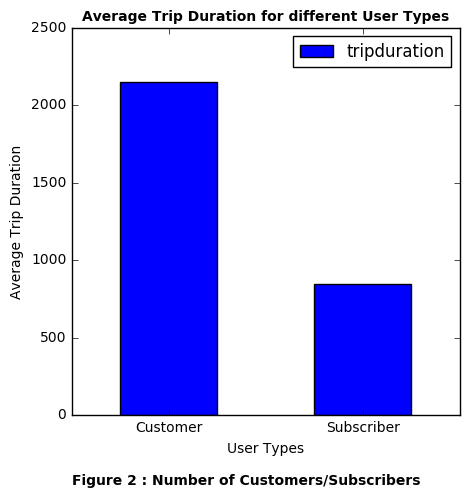

In [13]:
fig=pl.figure(figsize(5,5))
plotted = df.groupby(['usertype']).mean()
plotted.plot(kind='bar',rot=360)
pl.xlabel('User Types')
pl.ylabel('Average Trip Duration')
pl.title('Average Trip Duration for different User Types',fontsize = 10, fontweight = 'bold')
pl.text(-0.5,-450, 'Figure 2 : Number of Customers/Subscribers',fontsize = 10, fontweight = 'bold')

#### The average trip duration for the Customer is more than the Subscriber.
#### The reason we will prove is due to the fact that the customer tries to maximize the use of citibikes.

In [14]:
subscriber = df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday ]).mean()
customer = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()
subscriber = subscriber.to_frame()
customer = customer.to_frame()
subscriber

,tripduration
date,
0,829.153867
1,816.969227
2,861.103150
3,819.571240
4,842.312846
5,919.327838
6,911.917002


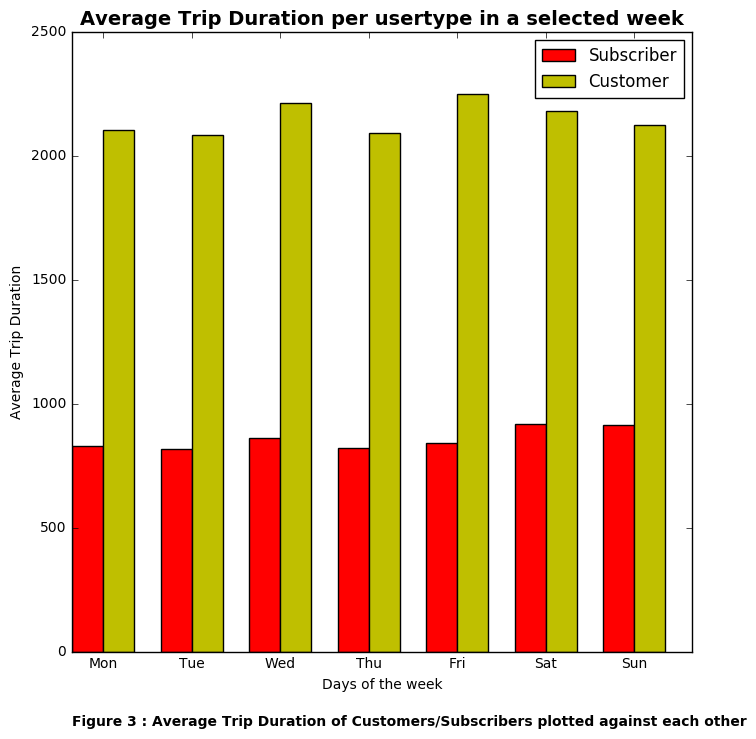

In [15]:
fig=pl.figure(figsize(8,8))
fig, ax = pl.subplots()
width = 0.35  

rects1 = ax.bar(subscriber.index.values , subscriber.tripduration, width, color='r')
rects2 = ax.bar(customer.index.values + width, customer.tripduration, width, color='y')

ax.set_xlabel('Days of the week')
ax.set_ylabel('Average Trip Duration')
ax.set_title('Average Trip Duration per usertype in a selected week', fontsize = 14, fontweight = 'bold')
ax.set_xticks(customer.index.values + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=10)
ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'), loc = 'upper right')
ax.text(0,-300, 'Figure 3 : Average Trip Duration of Customers/Subscribers plotted against each other',\
        fontsize = 10, fontweight = 'bold')

In [16]:
dataset = df.groupby(['usertype'])
dataset

In [17]:
fig=pl.figure(figsize(5,5))
p = df.groupby(['usertype']).mean()
p

,tripduration
usertype,
Customer,2152.122233
Subscriber,849.905440


In [19]:
std_p = df.groupby(['usertype']).std()
std_p

,tripduration
usertype,
Customer,16261.379400
Subscriber,5703.300886


In [54]:
# Calculating means
subscriber = df['tripduration'][df['usertype'] == 'Subscriber'].mean()
customer = df['tripduration'][df['usertype'] == 'Customer'].mean()

In [55]:
# Checking for equal standard deviation
sub_std = df['tripduration'][df['usertype'] == 'Subscriber'].std()
cus_std = df['tripduration'][df['usertype'] == 'Customer'].std()
sub_std == cus_std

False

In [23]:
sub = df['tripduration'][df['usertype'] == 'Subscriber'].groupby([df['date'].dt.weekday ]).mean()
cus = df['tripduration'][df['usertype'] == 'Customer'].groupby([df['date'].dt.weekday ]).mean()
total = df['tripduration'].groupby([df['date'].dt.weekday ]).mean()
sub = sub.to_frame()
cus = cus.to_frame()
total = total.to_frame()

In [27]:
stats.ttest_ind(sub, cus, equal_var= False)

Ttest_indResult(statistic=array([-43.70336847]), pvalue=array([  4.77027351e-13]))

### Since p value is less than 5% we can reject the null hypothesis

In [28]:
# Refered https://github.com/AllenDowney/CompStats/blob/master/effect_size.ipynb 
# Concept reference: http://www.leeds.ac.uk/educol/documents/00002182.htm

def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / numpy.sqrt(pooled_var)
    return d

In [30]:
effect_size = CohenEffectSize(cus, sub)

In [32]:
effect_size[0]

23.36043306527813

### Here we notice that the size of the difference between the samples is really large

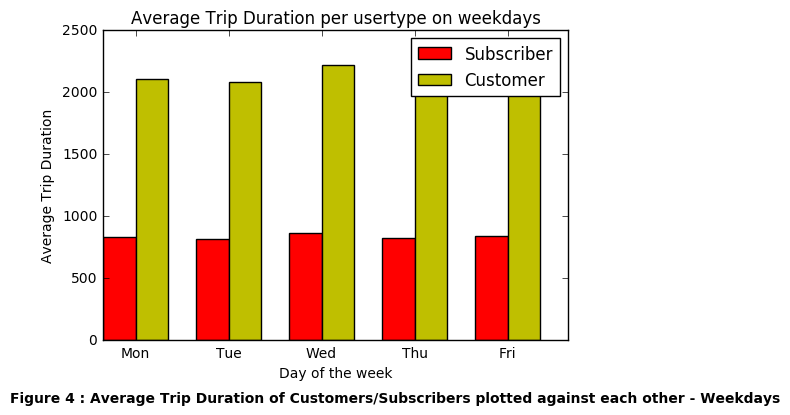

In [56]:
#fig=pl.figure(figsize(8,8))

ax = pl.subplot(111)

#pl.xlim(0,3000)
width = 0.35  
rects1 = ax.bar(sub.index.values[:5] , sub.tripduration[:5], width, color='r')

rects2 = ax.bar(cus.index.values[:5] + width, cus.tripduration[:5], width, color='y')



# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_xlabel('Day of the week')
ax.set_title('Average Trip Duration per usertype on weekdays')
ax.set_xticks(cus.index.values[:5] + width)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri'], fontsize=10)
ax.text(-1,-500, 'Figure 4 : Average Trip Duration of Customers/Subscribers plotted against each other - Weekdays',\
        fontsize = 10, fontweight = 'bold')

ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))

#fig=pl.figure(figsize(8,8))

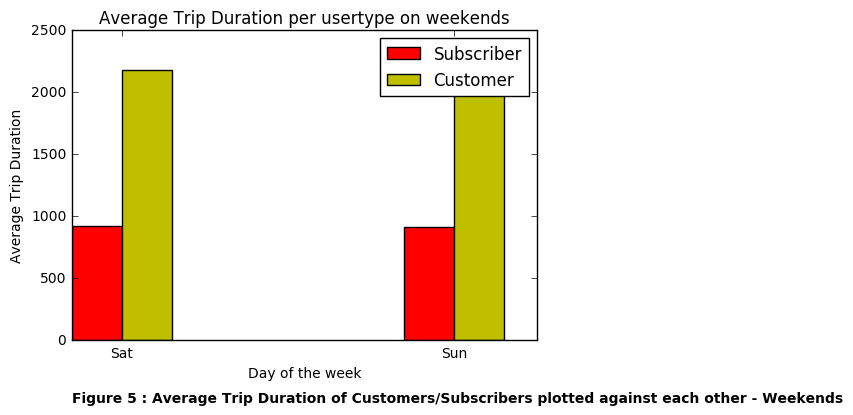

In [57]:
ax = pl.subplot(111)

#pl.xlim(0,3000)
width = 0.15  
rects1 = ax.bar(sub.index.values[5:] , sub.tripduration[5:], width, color='r')

rects2 = ax.bar(cus.index.values[5:] + width, cus.tripduration[5:], width, color='y')



# add some text for labels, title and axes ticks
ax.set_ylabel('Average Trip Duration')
ax.set_xlabel('Day of the week')
ax.set_title('Average Trip Duration per usertype on weekends')
ax.set_xticks(cus.index.values[5:] + width)
ax.xaxis.set_ticklabels(['Sat', 'Sun'], fontsize=10)
ax.text(5,-500, 'Figure 5 : Average Trip Duration of Customers/Subscribers plotted against each other - Weekends',\
        fontsize = 10, fontweight = 'bold')

ax.legend((rects1[0], rects2[0]), ('Subscriber', 'Customer'))